In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-emissions-by-country/co2_emissions_kt_by_country.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [3]:
df = pd.read_csv('/kaggle/input/co2-emissions-by-country/co2_emissions_kt_by_country.csv')
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [5]:
cols = []
for i in list(df.columns):
    cols.append({i: type(df[i].loc[0])})
cols

[{'country_code': str},
 {'country_name': str},
 {'year': numpy.int64},
 {'value': numpy.float64}]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='value', ylabel='Density'>

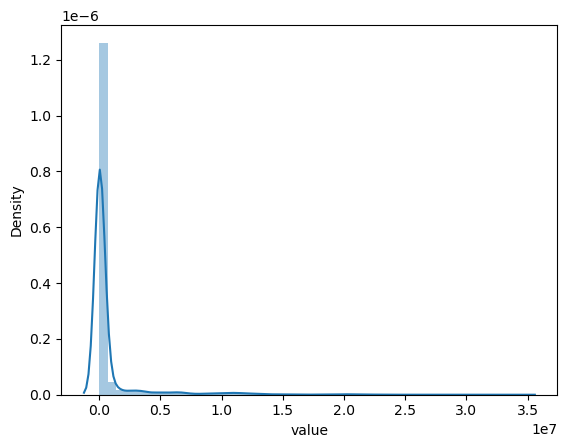

In [6]:
sb.distplot(df.value)

In [7]:
df.columns

Index(['country_code', 'country_name', 'year', 'value'], dtype='object')

In [8]:
print(df['country_name'].nunique(),df['year'].nunique())
df.describe()

256 60


,year,value
count,13953.000000,1.395300e+04
mean,1990.732316,8.254983e+05
std,17.187585,2.788923e+06
min,1960.000000,-8.067400e+01
25%,1976.000000,1.100000e+03
50%,1992.000000,1.390000e+04
75%,2006.000000,1.642779e+05
max,2019.000000,3.434401e+07


In [9]:
df.year.unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

<AxesSubplot:xlabel='count', ylabel='year'>

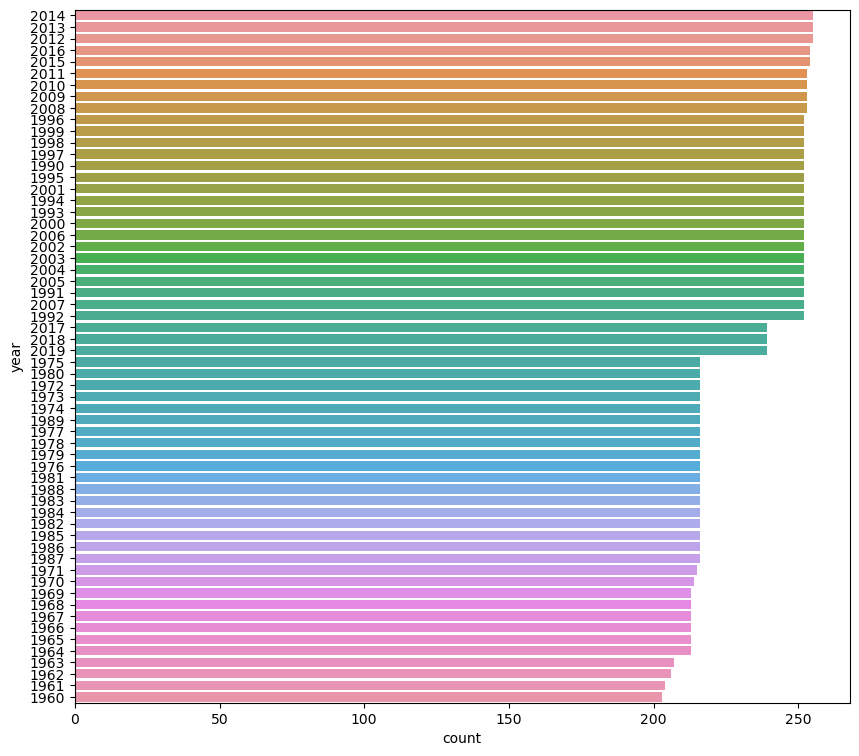

In [10]:
year_carbon = list(df.year.value_counts().index)
plt.figure(figsize = [10, 9],)
sb.countplot(df, y = 'year',order = year_carbon)


We have more data between 1992 and after.

In [11]:
df.groupby(['year'])['value'].mean().sort_values(ascending =False)

year
2019    1.353171e+06
2018    1.344521e+06
2017    1.310145e+06
2016    1.210105e+06
2014    1.208977e+06
2015    1.206571e+06
2013    1.203351e+06
2012    1.177142e+06
2011    1.165439e+06
2010    1.119298e+06
2008    1.053834e+06
2009    1.051740e+06
2007    1.043538e+06
2006    1.000794e+06
2005    9.608971e+05
1989    9.525101e+05
1988    9.401533e+05
2004    9.192399e+05
1987    9.050293e+05
1986    8.803493e+05
2003    8.720530e+05
1985    8.663115e+05
1984    8.277274e+05
2002    8.268019e+05
2001    8.113052e+05
1980    8.047968e+05
1983    8.044919e+05
1979    8.015439e+05
2000    7.946525e+05
1982    7.933445e+05
1981    7.867587e+05
1978    7.801780e+05
1999    7.690621e+05
1998    7.670173e+05
1997    7.619571e+05
1996    7.504631e+05
1977    7.481996e+05
1995    7.365442e+05
1976    7.226821e+05
1994    7.133949e+05
1993    7.120903e+05
1991    7.083010e+05
1992    7.081227e+05
1990    7.025203e+05
1975    6.859088e+05
1974    6.731385e+05
1973    6.672042e+05
1972    

In [12]:
first_50_most_carbon = df.groupby(['country_name'])['value'].mean().sort_values(ascending =False)[:50]
carb_list = list(first_50_most_carbon.index)[:5]
carb_list

['World', 'High income', 'IDA & IBRD total', 'OECD members', 'IBRD only']

There are bad country names inside data. I can't perform an unilateral correction on country names since there is no clear pattern to filter out just countries whithout domains and regions. Need to make an visual accessing of data to make proper analysis per continent or country.

In [13]:
df2 = df[df['country_name'].isin(carb_list)]
df2.describe()

,year,value
count,300.000000,3.000000e+02
mean,1989.500000,1.315080e+07
std,17.347038,6.449171e+06
min,1960.000000,3.522357e+06
25%,1974.750000,9.468955e+06
50%,1989.500000,1.154363e+07
75%,2004.250000,1.530673e+07
max,2019.000000,3.434401e+07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, '1960'),
  Text(1, 0, '1961'),
  Text(2, 0, '1962'),
  Text(3, 0, '1963'),
  Text(4, 0, '1964'),
  Text(5, 0, '1965'),
  Text(6, 0, '1966'),
  Text(7, 0, '1967'),
  Text(8, 0, '1968'),
  Text(9, 0, '1969'),
  Text(10, 0, '1970'),
  Text(11, 0, '1971'),
  Text(12, 0, '1972'),
  Text(13, 0, '1973'),
  Text(14, 0, '1974'),
  Text(15, 0, '1975'),
  Text(16, 0, '1976'),
  Text(17, 0, '1977'),
  Text(18, 0, '1978'),
  Text(19, 0, '1979'),
  Text(20, 0, '1980'),
  Text(21, 0, '1981'),
  Text(22, 0, '1982'),
  Text(23, 0, '1983'),
  Text(24, 0, '1984'),
  Text(25, 0, '1985'),
  Text(26, 0, '1986'),
  Text(27, 0, '1987'),
  Text(28, 0, '1988'),
  Text(29, 0, '1989'),
  Text(30, 0, '1990'),
  Text(31, 0, '1991'),


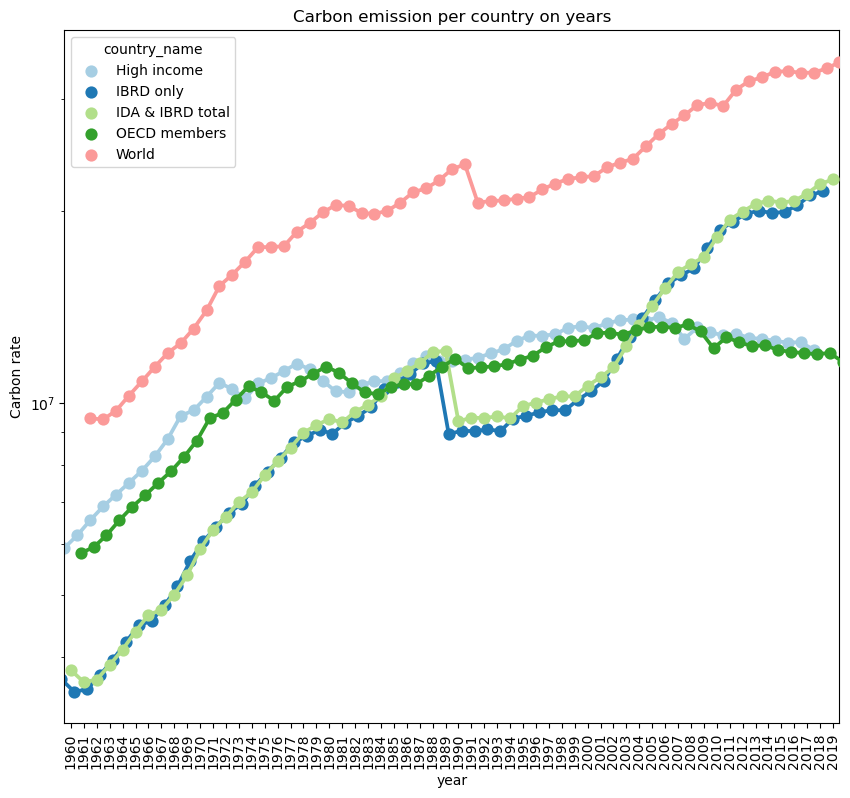

In [14]:
plt.figure(figsize = [10, 9])
sb.pointplot(data = df2, x = 'year', y = 'value', hue = 'country_name',
           palette = 'Paired',linestyles='-',dodge = 3,errorbar=None)
plt.title('Carbon emission per country on years')
plt.ylabel('Carbon rate')
plt.yscale('log')
plt.xticks(rotation =90)
# re-arrange legend to reduce overlapping